# Summer Olympics Data Analysis Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("summer.csv.")
df.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
df.shape

(31165, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [6]:
# Fill missing value
df['Country'].fillna(df['Country'].mode()[0], inplace = True)

In [7]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

## 1. In how many cities Summer Olympics is held so far?

In [8]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [9]:
df['City'].nunique()

22

## 2. Which sport is having most number of Gold Medals so far? (Top 5)

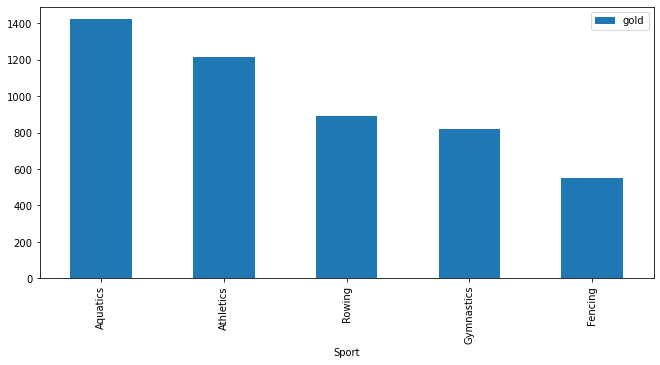

In [10]:
gold = df[df.Medal == 'Gold']

data = []

for Sport in gold['Sport'].unique():
    data.append([Sport , len(gold[gold['Sport']  == Sport])])
    
data = pd.DataFrame(data,columns = ['Sport','gold']).sort_values(by='gold',ascending=False).head(5)
data.plot(x = 'Sport', y = 'gold', kind = 'bar', figsize = (11,5))
plt.show()

## 3. Which sport is having most number of medals so far? (Top 5)

In [11]:
medal = df.groupby('Sport').count()['Medal'].sort_values(ascending = False).head(5)
medal

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

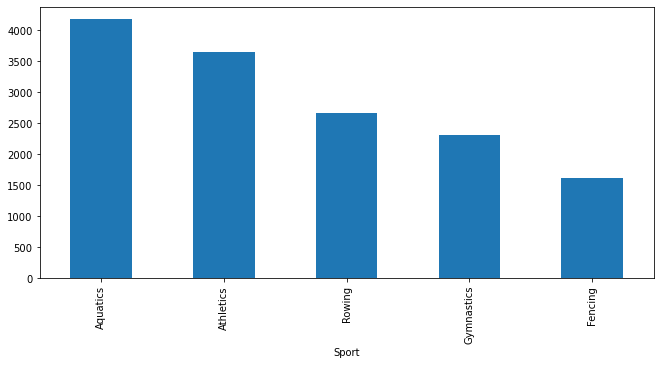

In [12]:
medal.plot.bar(figsize = (11,5))
plt.show()

## 4. Which player has won most number of medals? (Top 5)

In [13]:
won_medal = df.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head(5)
won_medal

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64

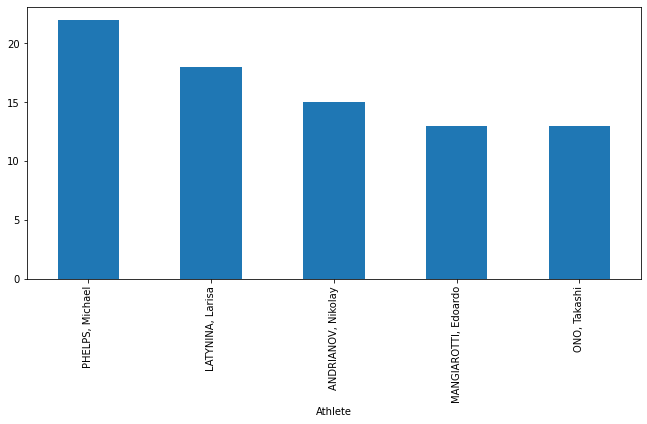

In [14]:
won_medal.plot.bar(figsize = (11,5))
plt.show()

## 5. Which player has won most number Gold Medals of medals? (Top 5)

In [15]:
gold = df[df.Medal == 'Gold']

won_gold_medal = gold.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head(5)
won_gold_medal

Athlete
PHELPS, Michael     18
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64

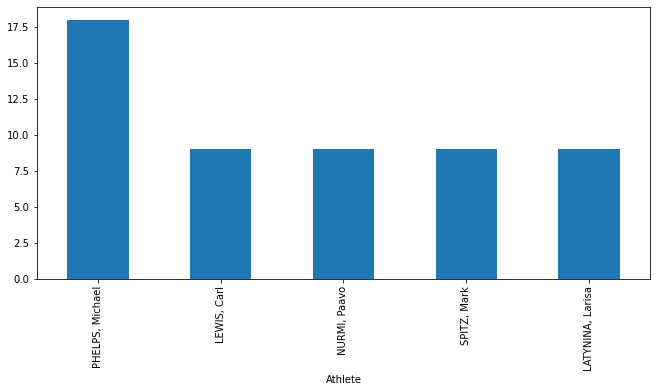

In [16]:
won_gold_medal.plot.bar(figsize = (11,5))
plt.show()

## 6. In which year India won first Gold Medal in Summer Olympics

In [17]:
gold = df[df.Medal == 'Gold']
gold[gold['Country']=='IND']['Year'].min()

1928

## 7. Which event is most popular in terms on number of players? (Top 5)

In [18]:
Popular_Event = df.groupby('Event').count()['Athlete'].sort_values(ascending = False).head(5)
Popular_Event

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

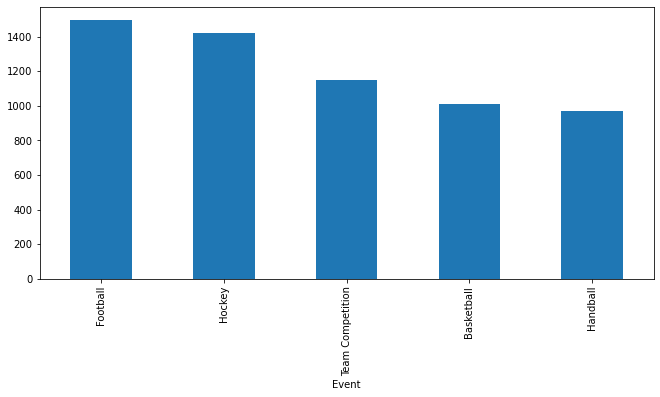

In [19]:
Popular_Event.plot.bar(figsize = (11,5))
plt.show()

## 8. Which sport is having most female Gold Medalists? (Top 5)

In [20]:
gold = df[df.Medal == 'Gold']
goldFemale = gold[gold.Gender == 'Women']

gold_medalists = []

for Sport in goldFemale['Sport'].unique():
    gold_medalists.append([Sport , len(goldFemale[goldFemale['Sport']  == Sport])])  

<AxesSubplot:xlabel='Sport'>

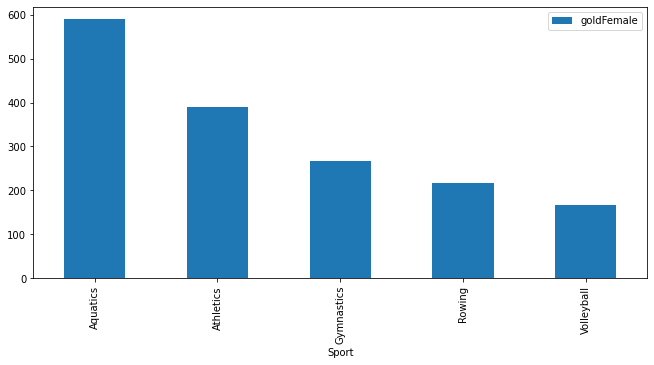

In [21]:
gold_medalists = pd.DataFrame(gold_medalists,columns = ['Sport','goldFemale']).sort_values(by='goldFemale',ascending=False).head(5)
gold_medalists.plot(x = 'Sport', y = 'goldFemale', kind = 'bar', figsize = (11,5))